# **1. Data Preparation:**

# first import the python libraries for load the data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload=files.upload()

Saving heart_disease.csv to heart_disease (1).csv


In [ ]:
df=pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


# **2. Exploratory Data Analysis (EDA)**

# Checking for missing valuse

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


# Visualizing the distribution of features

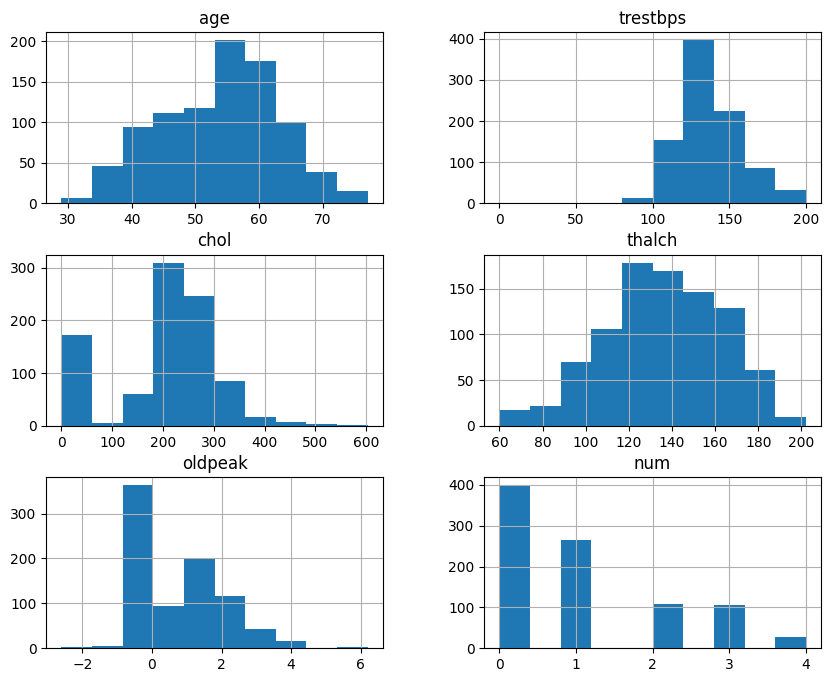

In [ ]:
df.hist(figsize=(10,8))
plt.show()

# Box plots for outlier detection

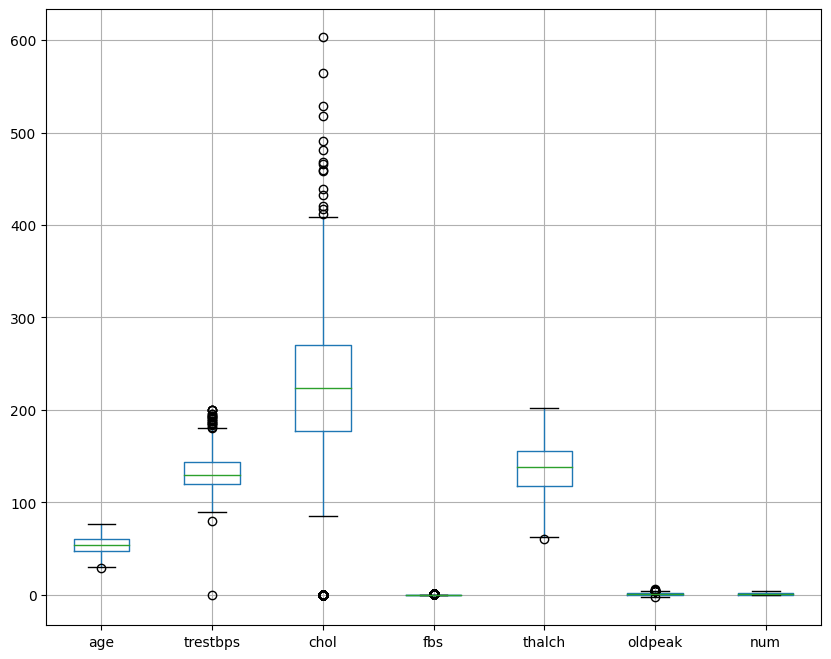

In [ ]:
df.boxplot(figsize=(10, 8))
plt.show()

# Correlation matrix

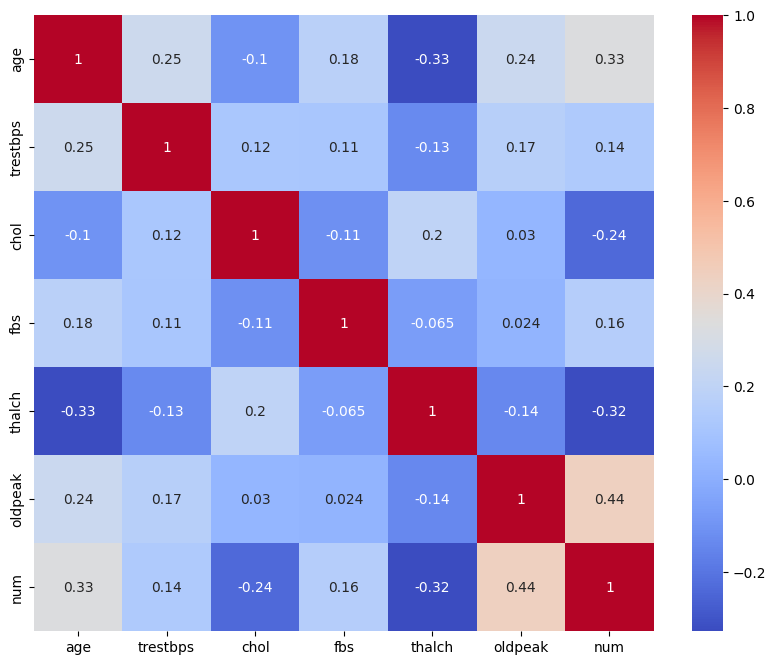

In [ ]:
plt.figure(figsize=(10, 8))
# Calculate correlation only on numeric columns

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# **3. Feature Engineering:**

# Label Encoding and One-Hot Encoding for categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Handling the missing values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer =SimpleImputer(strategy='median')

In [ ]:
df['oldpeak']=imputer.fit_transform(df[['oldpeak']])

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


# Label Encoding

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
df['cp_label'] = label_encoder.fit_transform(df['cp'])

In [ ]:
df['cp_label']

,cp_label
0,3
1,1
2,0
3,3
4,0
...,...
903,0
904,0
905,2
906,2


# One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['cp'], drop_first=True)

# Splitting data into x and y

In [50]:
x = df.drop('cp_label', axis=1)
y = df['cp_label']

# **4. Decision Tree Classification**

# First import the decision tree library

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier

In [57]:
x_train = pd.get_dummies(x_train)

In [58]:
x_test = pd.get_dummies(x_test)

In [59]:
df_classifier=DecisionTreeClassifier(random_state=42)

In [61]:
df_classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
# Predict on test data

y_pred=df_classifier.predict(x_test)

In [63]:
# Evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [64]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

Precision: 1.00


In [65]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

Recall: 1.00


In [66]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 1.00


# **5. Hyperparameter Tuning**

In [67]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning

In [68]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [70]:

grid_search = GridSearchCV(estimator=df_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

# Best parameters

In [71]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


# Evaluate with the best model

In [72]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

In [73]:
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")

Optimized Accuracy: 1.00


# **6. Model Evaluation and Visualization**

In [74]:
from sklearn import tree

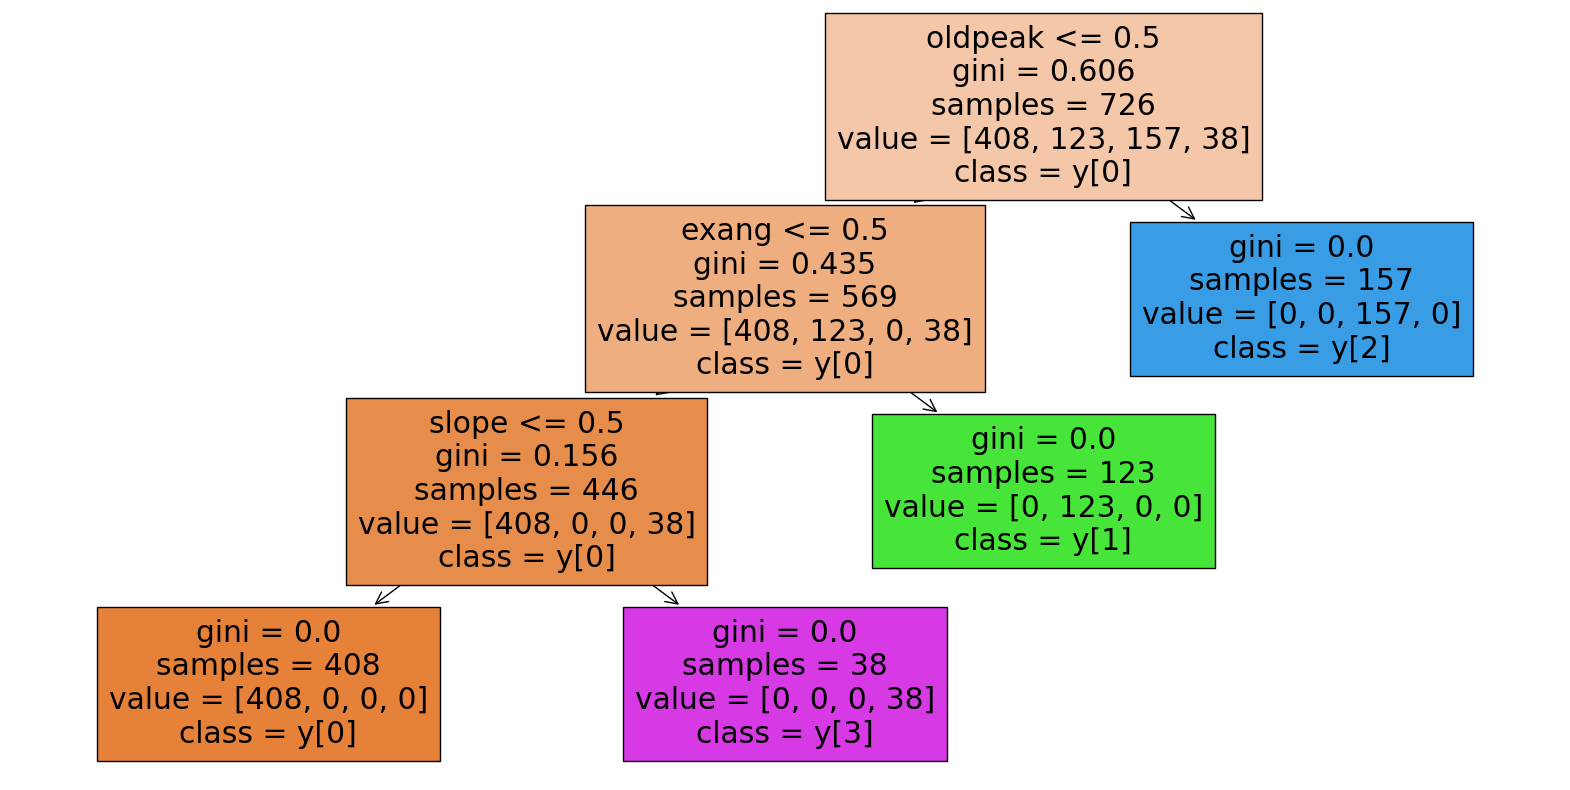

In [76]:
plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, feature_names=x.columns, filled=True, class_names=True)
plt.show()

# **Interview Questions:**

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

max_depth: Limits the depth of the tree to prevent overfitting.

min_samples_split: The minimum number of samples required to split a node.

criterion: Defines the function to measure the quality of a split (gini for Gini impurity, entropy for Information Gain).

# 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding :- A data transformation technique that assigns a unique integer to each category in a categorical variable

One-Hot Encoding :- Creates a binary column for each category , avoiding the ordinary problem but increasing dimensionality